## Clustering Analysis

This script contains the following:

- Importing libraries and data and renaming columns
- The elbow technique
- k-means clustering

## Importing libraries and data and renaming columns

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
#ensuring the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#creating path to import the files
path = r'C:\Users\rbrand\New York Citi Bikes'

In [4]:
# Importing cb_clean_data4.csv data set from prepared data.
cb_clean_data4 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cb_clean_data4.csv'), index_col=False)

In [5]:
cb_clean_data4.shape

(50000, 22)

In [6]:
cb_clean_data4.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,distance
0,0,0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,...,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,16.550000,1451.105634
1,1,1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,...,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,9.683333,1637.904949
2,2,2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,...,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,6.016667,922.070726
3,3,3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,...,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,9.350000,1543.233294
4,4,4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,...,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,1,38.266667,1469.427475


In [7]:
# Dropping the 'Unnamed: 0'  columns
cb_clean_data4 = cb_clean_data4.drop(columns=['Unnamed: 0'])

In [8]:
# Renaming the 'Unnamed: 0.1' column to 'index'
cb_clean_data4 = cb_clean_data4.rename(columns={'Unnamed: 0.1': 'index'})

In [9]:
cb_clean_data4.head()

,index,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,distance
0,0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,...,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,16.550000,1451.105634
1,1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,...,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,9.683333,1637.904949
2,2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,...,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,6.016667,922.070726
3,3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,...,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,9.350000,1543.233294
4,4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,...,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,1,38.266667,1469.427475


In [10]:
# Displaying the first few rows of the cleaned DataFrame
print(cb_clean_data4.head())

   index trip_id  bike_id weekday  start_hour       start_time  \
0      0  LnQzQk    16013     Mon          18   9/9/2013 18:18   
1      1  IL9boN    15230     Thu          18  9/12/2013 18:38   
2      2  46clGB    17942     Wed          19  9/18/2013 19:44   
3      3  v7vdFt    19683     Sat          11  9/28/2013 11:54   
4      4  VGBsb5    18024     Sat          18   9/7/2013 18:08   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude  ... end_station_id     end_station_name  \
0               -73.991382  ...            334      W 20 St & 7 Ave   
1               -74.002472  

In [11]:
# Specify the categorical columns to drop
categorical_columns = ['trip_id', 'weekday', 'start_time', 'start_station_name', 'end_station_name', 'subscriber','start_time','end_time']

In [12]:
# Dropping the specified categorical columns for the analysis
cb_clean_data4 = cb_clean_data4.drop(columns=categorical_columns)

In [13]:
# Displaying the first few rows of the DataFrame after dropping the columns
print(cb_clean_data4.head())

   index  bike_id  start_hour  start_station_id  start_station_latitude  \
0      0    16013          18               523               40.754666   
1      1    15230          18               257               40.719392   
2      2    17942          19               479               40.760193   
3      3    19683          11               527               40.743156   
4      4    18024          18               521               40.750450   

   start_station_longitude         end_time  end_station_id  \
0               -73.991382   9/9/2013 18:35             334   
1               -74.002472  9/12/2013 18:48             236   
2               -73.991255  9/18/2013 19:50             513   
3               -73.974347  9/28/2013 12:03             441   
4               -73.994811   9/7/2013 18:46             476   

   end_station_latitude  end_station_longitude  trip_duration  birth_year  \
0             40.742388             -73.997262            993      1968.0   
1             40

## 2.The elbow technique

In [13]:
# Defining the range of potential clusters in the data.
num_cl = range(1, 10)
# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Creating the score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(cb_clean_data4).score(cb_clean_data4) for i in range(len(kmeans))] # Creates a score that represents 
score

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

[-10680913188902.639,
 -2868409899451.1553,
 -1421643419019.7722,
 -915313075861.9453,
 -680972734005.6431,
 -553600575195.499,
 -476845132165.6677,
 -427064253770.0808,
 -392877397164.6754]

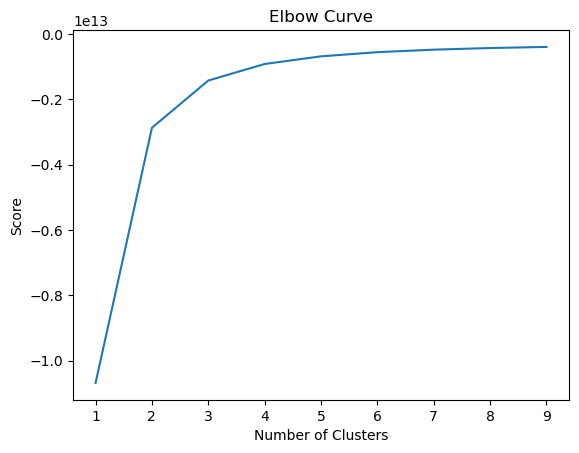

In [15]:
# Plotting the Elbow Curve
plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'elbow_curve.png'))

# Showing the plot
plt.show()

In [ ]:
In this particular scenario, we notice a significant leap from two to three on the x-axis. However, beyond this point, the curve appears to stabilize. This observation suggests that the ideal number of clusters for our analysis is three.

## 3.K.MEANS CLUSTERING

In [17]:
# Creating the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fitting the k-means object to the data.
kmeans.fit(cb_clean_data4)

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
cb_clean_data4['clusters'] = kmeans.fit_predict(cb_clean_data4)

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
cb_clean_data4.head()

,index,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender,trip_duration_minutes,distance,clusters
0,0,16013,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968.0,2,16.550000,1451.105634,0
1,1,15230,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983.0,1,9.683333,1637.904949,0
2,2,17942,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989.0,1,6.016667,922.070726,0
3,3,19683,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988.0,2,9.350000,1543.233294,0
4,4,18024,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296,1978.0,1,38.266667,1469.427475,0


In [21]:
cb_clean_data4['clusters'].value_counts()

clusters
1    16720
2    16666
0    16614
Name: count, dtype: int64

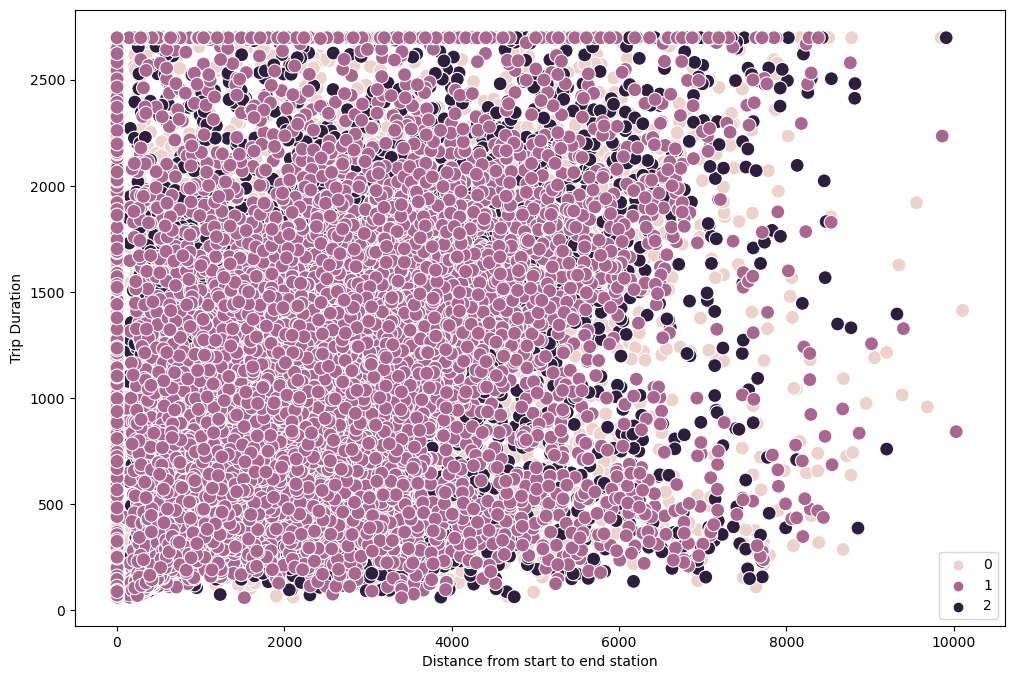

In [23]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=cb_clean_data4['distance'], y=cb_clean_data4['trip_duration'], hue=kmeans.labels_, s=100)
ax.grid(False)  # Removing the grid from the background
plt.xlabel('Distance from start to end station')  # Labeling x-axis
plt.ylabel('Trip Duration')  # Labeling y-axis

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cluster_scatterplot.png'))

# Showing the plot
plt.show()

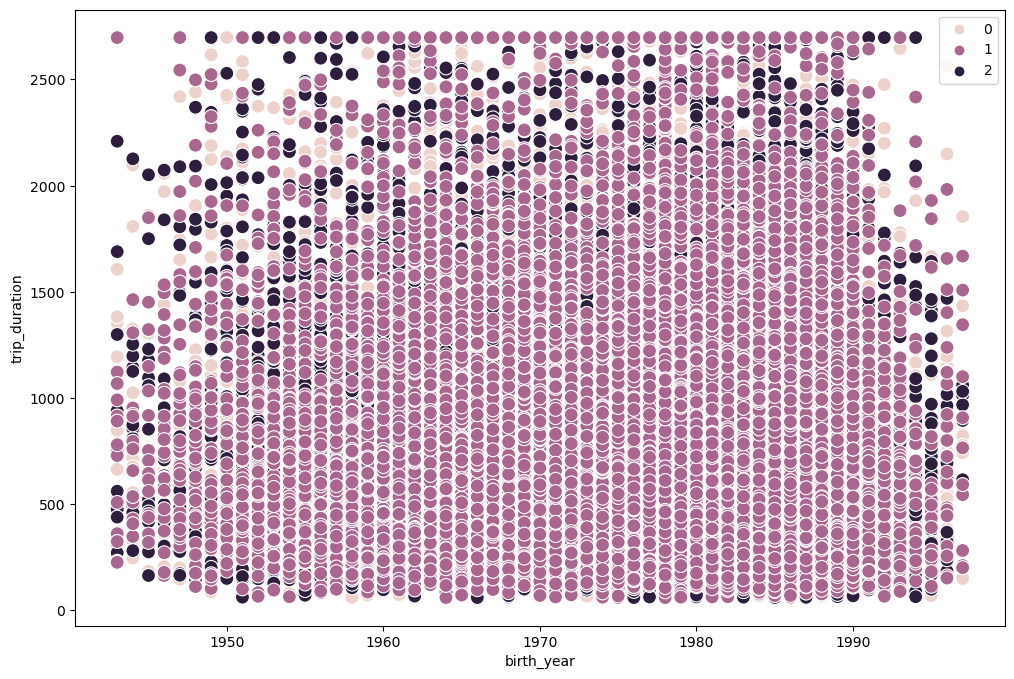

In [26]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=cb_clean_data4['birth_year'], y=cb_clean_data4['trip_duration'], hue=kmeans.labels_, s=100)
ax.grid(False)  # Removing the grid from the background
plt.xlabel('birth_year')  # Labeling x-axis
plt.ylabel('trip_duration')  # Labeling y-axis

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cluster_birth_year_vs_trip_duration.png'))

# Showing the plot
plt.show()

In [28]:
cb_clean_data4.loc[cb_clean_data4['clusters'] == 2, 'cluster'] = 'dark purple'
cb_clean_data4.loc[cb_clean_data4['clusters'] == 1, 'cluster'] = 'purple'
cb_clean_data4.loc[cb_clean_data4['clusters'] == 0, 'cluster'] = 'pink'

In [30]:
cb_clean_data4.groupby('cluster').agg({'index':['mean', 'median'], 
                         'birth_year':['mean', 'median'], 
                         'distance':['mean', 'median'],
                          'trip_duration':['mean', 'median']})

index            birth_year             distance  \
                    mean   median         mean  median         mean   
cluster                                                               
dark purple  24946.50012  24946.5  1976.053102  1978.0  1856.694301   
pink          8306.50000   8306.5  1976.139882  1978.0  1864.899209   
purple       41639.49988  41639.5  1976.128230  1978.0  1862.202755   

                         trip_duration         
                  median          mean median  
cluster                                        
dark purple  1482.141461    835.727409  669.0  
pink         1492.826563    842.209943  674.0  
purple       1489.747968    839.021292  673.0

Based on the clustering results provided, we can infer several potential applications in future steps of an analytics pipeline:

- Segmentation of Citibike Users: The clustering has grouped Citibike users into three distinct clusters (dark purple, pink, and purple). These clusters likely represent different user segments based on their behavior, such as frequency of trips, birth year, distance traveled, and trip duration.

- Targeted Marketing Strategies: Understanding user segments can inform targeted marketing strategies tailored to each cluster's characteristics. For example, marketing campaigns can be customized based on the preferences and behaviors of each cluster, maximizing the effectiveness of promotional efforts.

- Service Optimization: Insights from clustering can guide service optimization efforts. For instance, Citibike can allocate resources more efficiently by adjusting station locations, bike availability, and operational schedules to better accommodate the needs of each user segment.

- Product Development: The analysis can provide valuable insights into potential product enhancements or new features that cater to the preferences of different user segments. This can help improve user satisfaction and retention over time.

- Predictive Analytics: By leveraging the characteristics of each cluster, predictive models can be developed to forecast future user behavior, such as demand for Citibike services, peak usage times, and potential areas for expansion.

Overall, these clustering results serve as a foundational step in understanding user behavior and preferences, enabling data-driven decision-making and strategic planning for Citibike and similar bike-sharing services.